**Thêm các thư viện cần thiết**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Đọc dữ liệu

In [35]:
# Hiển thị biểu đồ rõ nét hơn
plt.rcParams['figure.dpi'] = 100

df = pd.read_csv('diem_thptqg_2019.csv')
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18485 entries, 0 to 18484
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   So Bao Danh  18485 non-null  int64  
 1   Toan         18456 non-null  float64
 2   Ngu Van      18256 non-null  float64
 3   Ngoai Ngu    16819 non-null  float64
 4   Vat Ly       6700 non-null   float64
 5   Hoa Hoc      6731 non-null   float64
 6   Sinh Hoc     6645 non-null   float64
 7   KHTN         6571 non-null   float64
 8   Lich Su      11682 non-null  float64
 9   Dia Ly       11601 non-null  float64
 10  GDCD         10229 non-null  float64
 11  KHXH         10229 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.7 MB
None


# 2. Xử lí dữ liệu 

## 2.1 Làm sạch dữ liệu

**Lọc các dữ liệu bị thiếu hoặc bị bỏ trong dữ liệu**

In [3]:
cols_diem = ['Toan','Ngu Van','Ngoai Ngu','Vat Ly','Hoa Hoc','Sinh Hoc','KHTN','Lich Su','Dia Ly','GDCD','KHXH']

# Thay thế các chuỗi 'vắng', 'không thi' thành NaN
df.replace(['vắng', 'miễn', 'không thi', 'KhongThi'], np.nan, inplace=True)

# Chuyển sang float
for c in cols_diem:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    
# Kiểm tra lại
print(df[cols_diem])

       Toan  Ngu Van  Ngoai Ngu  Vat Ly  Hoa Hoc  Sinh Hoc  KHTN  Lich Su  \
0       4.8     6.50        3.8     NaN      NaN       NaN   NaN     4.25   
1       3.0     2.25        NaN     NaN      NaN       NaN   NaN     2.75   
2       3.2     2.50        NaN     NaN      NaN       NaN   NaN     2.25   
3       5.8     3.25        NaN     NaN      NaN       NaN   NaN     2.50   
4       6.8     6.00        8.6     6.0      3.5      4.25  4.58      NaN   
...     ...      ...        ...     ...      ...       ...   ...      ...   
18480   7.2     4.75        3.0     NaN      NaN       NaN   NaN     5.00   
18481   4.4     7.00        3.6     NaN      NaN       NaN   NaN     3.50   
18482   5.8     5.00        2.8     NaN      NaN       NaN   NaN     2.75   
18483   5.8     4.00        2.8     NaN      NaN       NaN   NaN     5.50   
18484   7.2     5.25        3.0     5.0      4.0      3.00  4.00      NaN   

       Dia Ly  GDCD  KHXH  
0        6.50  8.75  6.50  
1        3.00   NaN

# 3. Thao tác với dữ liệu

## 3.1 Thêm cột "Số Môn Thi"

**Thêm vào cột "Số Môn Thi" để thống kê một thí sinh thi bao nhiêu môn**

In [4]:
# Các môn thi
list_of_subjects = ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Vat Ly', 'Hoa Hoc', 'Sinh Hoc', 'Lich Su', 'Dia Ly', 'GDCD']
df['So Mon Thi'] = df[list_of_subjects].notna().sum(axis=1).tolist()
df

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH,So Mon Thi
0,3000001,4.8,6.50,3.8,NaN,NaN,NaN,NaN,4.25,6.50,8.75,6.50,6
1,3000002,3.0,2.25,NaN,NaN,NaN,NaN,NaN,2.75,3.00,NaN,NaN,4
2,3000003,3.2,2.50,NaN,NaN,NaN,NaN,NaN,2.25,3.75,NaN,NaN,4
3,3000004,5.8,3.25,NaN,NaN,NaN,NaN,NaN,2.50,5.50,NaN,NaN,4
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,3018571,7.2,4.75,3.0,NaN,NaN,NaN,NaN,5.00,6.00,7.50,6.17,6
18481,3018572,4.4,7.00,3.6,NaN,NaN,NaN,NaN,3.50,6.25,6.75,5.50,6
18482,3018573,5.8,5.00,2.8,NaN,NaN,NaN,NaN,2.75,4.50,5.50,4.25,6
18483,3018574,5.8,4.00,2.8,NaN,NaN,NaN,NaN,5.50,6.50,8.25,6.75,6


## 3.2 Phần trăm thi mỗi môn của thí sinh

In [5]:
thi_toan = df[df['Toan'] >= 0].count()['Toan']
thi_van = df[df['Ngu Van'] >= 0].count()['Ngu Van']
thi_nn = df[df['Ngoai Ngu'] >= 0].count()['Ngoai Ngu']

thi_ly = df[df['Vat Ly'] >= 0].count()['Vat Ly']
thi_hoa = df[df['Hoa Hoc'] >= 0].count()['Hoa Hoc']
thi_sinh = df[df['Sinh Hoc'] >= 0].count()['Sinh Hoc']

thi_su = df[df['Lich Su'] >= 0].count()['Lich Su']
thi_dia = df[df['Dia Ly'] >= 0].count()['Dia Ly']
thi_gdcd = df[df['GDCD'] >= 0].count()['GDCD']

tong_thi_sinh = df.count()['So Bao Danh']

subject = ['Toán', 'Ngữ Văn', 'Ngoại Ngữ', 'Vật Lý', 'Hóa Học', 'Sinh Học', 'Lịch Sử', 'Địa Lý',  'GDCD']

# Số thí sinh thi mỗi môn
no_of_stu = [thi_toan, thi_van, thi_nn, thi_ly, thi_hoa, thi_sinh, thi_su, thi_dia, thi_gdcd]

# Phần trăm thí sinh thi mỗi môn
ptram_thi = no_of_stu / tong_thi_sinh

*Dựng hình*

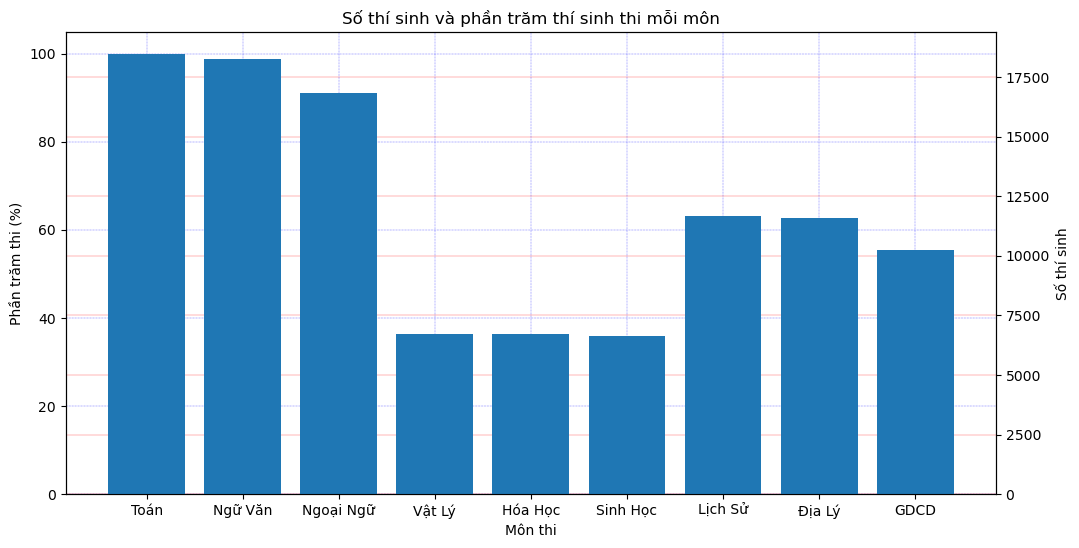

In [6]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)

ax1.bar(subject, ptram_thi * 100)
ax1.set_xlabel('Môn thi')
ax1.set_ylabel('Phần trăm thi (%)')
ax1.grid(color='b', ls='-.', lw = 0.2)
ax1.set_axisbelow(True)

# Biểu diễn chung 1 đồ thị
ax2 = ax1.twinx()

ax2.bar(subject, no_of_stu)
ax2.set_ylabel('Số thí sinh')
ax2.grid(color='r', ls='-', lw = 0.2)
ax2.set_axisbelow(True)

plt.title('Số thí sinh và phần trăm thí sinh thi mỗi môn')
plt.show()

**Kết luận từ dữ liệu:** 
- Thí sinh thi tổ hợp KHXH (Sử + Địa + GDCD) nhiều hơn thí sinh thi tổ hợp KHTN (Lý + Hóa + Sinh). 
- Toán và ngữ văn là các môn bắt buộc nên số thí sinh thi ở 2 môn này chênh lệch nhau không đáng kế

## 3.3 Số học sinh thi x môn

In [7]:
# Ensure the 'So Mon Thi' column exists
if 'So Mon Thi' not in df.columns:
	# Create the 'So Mon Thi' column if it doesn't exist
	list_of_subjects = ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Vat Ly', 'Hoa Hoc', 'Sinh Hoc', 'Lich Su', 'Dia Ly', 'GDCD']
	df['So Mon Thi'] = df[list_of_subjects].notna().sum(axis=1).tolist()

cols = ['So Bao Danh', 'So Mon Thi']
thptqg_so_mon = df[cols].groupby('So Mon Thi').count().reset_index()
thptqg_so_mon = thptqg_so_mon.rename(columns={'So Bao Danh': 'So Thi Sinh'})
thptqg_so_mon

,So Mon Thi,So Thi Sinh
0,1,8
1,2,2
2,3,337
3,4,1347
4,5,127
5,6,16631
6,7,5
7,9,28


Các thí sinh phần lớn tham gia từ 3 đến 6 môn. Vậy nên ta sẽ nhóm các thí sinh ở các nhóm khác chung 1 nhóm là 'Other'

In [36]:
other = {'So Mon Thi': 'other', 'So Thi Sinh': thptqg_so_mon[thptqg_so_mon['So Thi Sinh'] < 100].sum()['So Thi Sinh']}
other

{'So Mon Thi': 'other', 'So Thi Sinh': 43}

Thêm row 'other' và xóa các row có số thí sinh < 100

In [9]:
# Xóa các hàng có số thí sinh thấp hơn 100
thptqg_so_mon = thptqg_so_mon.drop(thptqg_so_mon[thptqg_so_mon['So Thi Sinh'] < 100].index)

# Thêm hàng other
other_df = pd.DataFrame([other])  # Convert the dictionary to a DataFrame
thptqg_so_mon = pd.concat([thptqg_so_mon, other_df], ignore_index=True)

thptqg_so_mon

,So Mon Thi,So Thi Sinh
0,3,337
1,4,1347
2,5,127
3,6,16631
4,other,43


*Dựng hình*

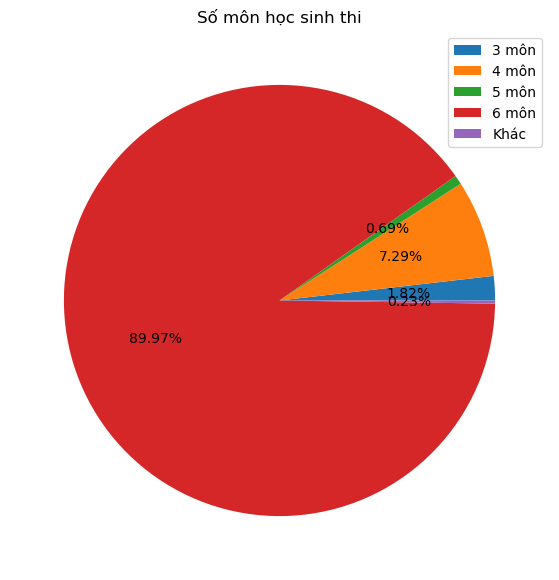

In [10]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

ax.pie(thptqg_so_mon['So Thi Sinh'], autopct='%.2f%%')

ax.legend(labels=('3 môn', '4 môn', '5 môn', '6 môn', 'Khác'), loc='upper right')
plt.title('Số môn học sinh thi')

plt.show()

## 3.4 Điểm trung bình theo số lượng môn thi

In [26]:
# Copy bảng để tránh thao tác trên dữ liệu gốc
thptqg_avg = df.copy()

# Tạo cột 'điểm trung bình'
thptqg_avg['Diem Trung Binh'] = thptqg_avg[thptqg_avg[list_of_subjects] >= 0].mean(axis=1).round(2).tolist()

thptqg_avg

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH,So Mon Thi,Diem Trung Binh
0,3000001,4.8,6.50,3.8,NaN,NaN,NaN,NaN,4.25,6.50,8.75,6.50,6,5.77
1,3000002,3.0,2.25,NaN,NaN,NaN,NaN,NaN,2.75,3.00,NaN,NaN,4,2.75
2,3000003,3.2,2.50,NaN,NaN,NaN,NaN,NaN,2.25,3.75,NaN,NaN,4,2.92
3,3000004,5.8,3.25,NaN,NaN,NaN,NaN,NaN,2.50,5.50,NaN,NaN,4,4.26
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,NaN,NaN,NaN,NaN,6,5.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,3018571,7.2,4.75,3.0,NaN,NaN,NaN,NaN,5.00,6.00,7.50,6.17,6,5.58
18481,3018572,4.4,7.00,3.6,NaN,NaN,NaN,NaN,3.50,6.25,6.75,5.50,6,5.25
18482,3018573,5.8,5.00,2.8,NaN,NaN,NaN,NaN,2.75,4.50,5.50,4.25,6,4.39
18483,3018574,5.8,4.00,2.8,NaN,NaN,NaN,NaN,5.50,6.50,8.25,6.75,6,5.48


In [27]:
# Cột cần lấy
cols = ['So Mon Thi', 'Diem Trung Binh']

# Lấy điểm trung bình theo số môn thí sinh thi
thptqg_avg = thptqg_avg[cols].groupby('So Mon Thi').mean().round(2).reset_index()

thptqg_avg

,So Mon Thi,Diem Trung Binh
0,1,1.91
1,2,4.78
2,3,5.79
3,4,3.96
4,5,5.69
5,6,5.80
6,7,4.37
7,9,5.37


Do không có thí sinh nào thi 8 môn, thêm một hàng 8 môn có điểm trung bình là 0, biểu thị là không có thí sinh thi 8 môn.

In [28]:
# Tạo df mới có dữ liệu 8 - 0
add_df = pd.DataFrame({'So Mon Thi': 8, 'Diem Trung Binh': 0}, index=[6.5])

# Nối thptqg_avg với add_df
thptqg_avg = pd.concat([thptqg_avg, add_df], ignore_index=False)

# Sort lại thptqg_avg theo index
thptqg_avg = thptqg_avg.sort_index().reset_index(drop=True)

thptqg_avg

,So Mon Thi,Diem Trung Binh
0,1,1.91
1,2,4.78
2,3,5.79
3,4,3.96
4,5,5.69
5,6,5.80
6,7,4.37
7,8,0.00
8,9,5.37


In [29]:
# Thiết lập các tham số cần thiết
so_mon = thptqg_avg['So Mon Thi'].tolist()
diem_trung_binh = thptqg_avg['Diem Trung Binh'].tolist()

**Dựng hình**

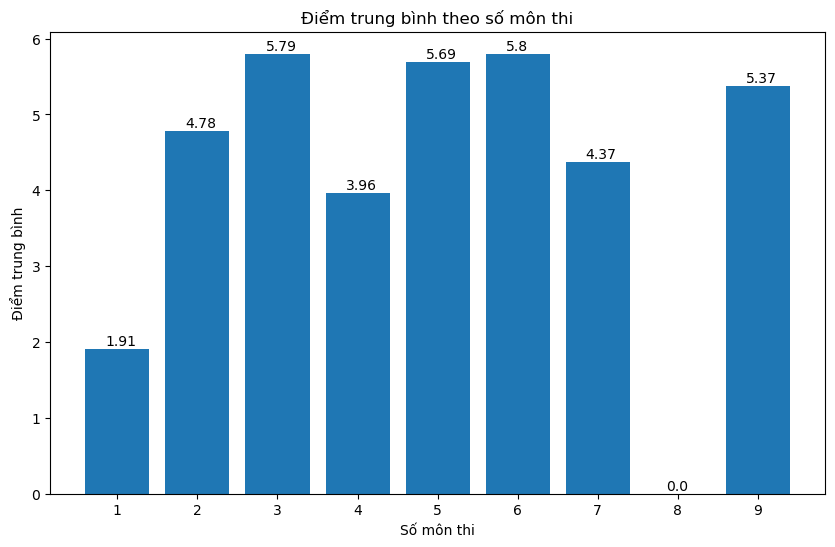

In [30]:
fig = plt.figure(figsize=(10, 6))
plt.bar(so_mon, diem_trung_binh)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel('Số môn thi')
plt.ylabel('Điểm trung bình')
plt.title('Điểm trung bình theo số môn thi')

# Thêm giá trị thực vào phía trên mỗi bar
for index, value in enumerate(diem_trung_binh):
    plt.text(index + 0.85, value + 0.05, str(value))

plt.show()

## 3.5 Phổ điểm và Violin plot của từng môn

=== Thống kê mô tả môn Toan ===
Số lượng: 18456
Điểm trung bình: 6.1
Điểm min: 0.6
Điểm max: 9.8
Độ lệch chuẩn: 1.66
----------------------------------------


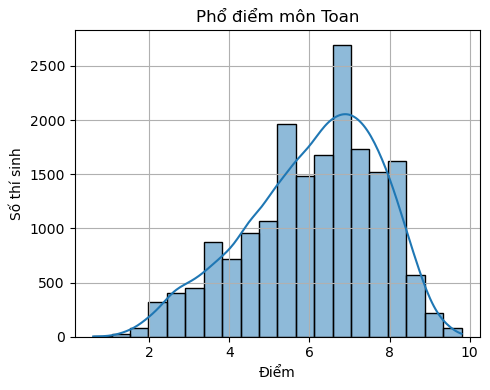

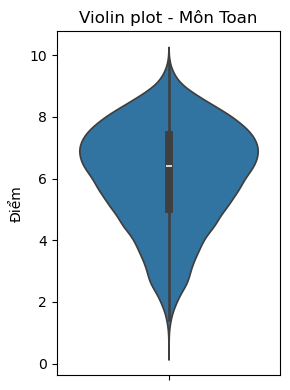



=== Thống kê mô tả môn Ngu Van ===
Số lượng: 18256
Điểm trung bình: 5.63
Điểm min: 0.0
Điểm max: 9.0
Độ lệch chuẩn: 1.34
----------------------------------------


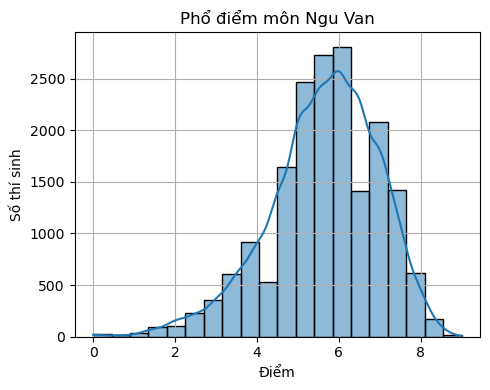

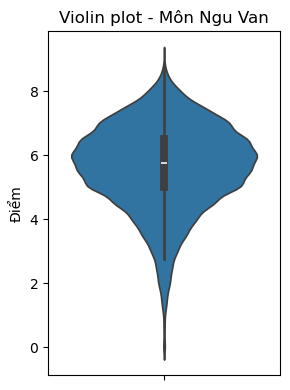



=== Thống kê mô tả môn Ngoai Ngu ===
Số lượng: 16819
Điểm trung bình: 4.7
Điểm min: 0.0
Điểm max: 10.0
Độ lệch chuẩn: 1.93
----------------------------------------


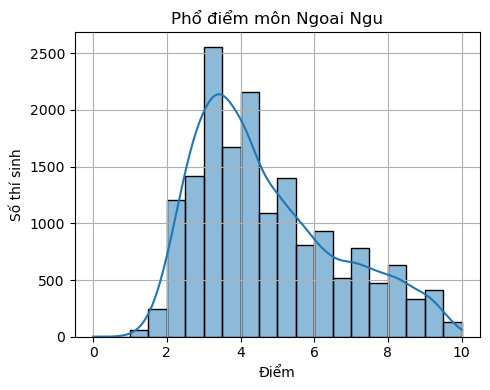

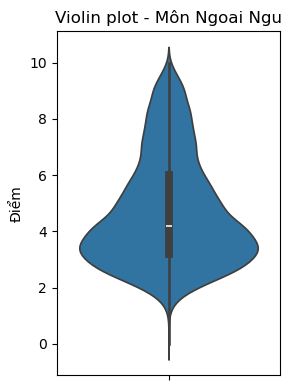



=== Thống kê mô tả môn Vat Ly ===
Số lượng: 6700
Điểm trung bình: 6.05
Điểm min: 1.5
Điểm max: 9.5
Độ lệch chuẩn: 1.49
----------------------------------------


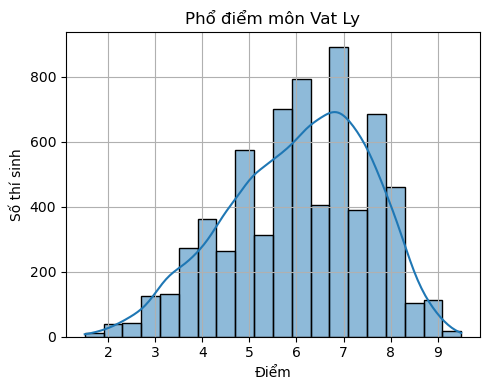

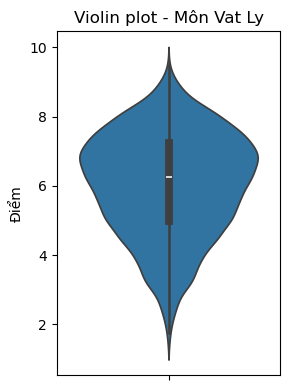



=== Thống kê mô tả môn Hoa Hoc ===
Số lượng: 6731
Điểm trung bình: 5.61
Điểm min: 1.25
Điểm max: 9.75
Độ lệch chuẩn: 1.52
----------------------------------------


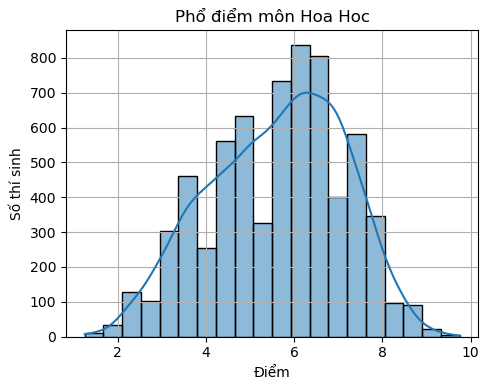

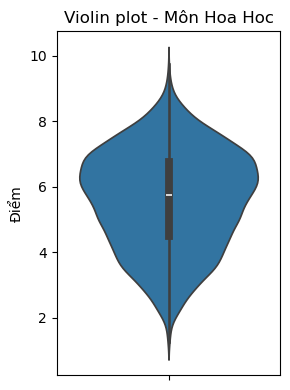



=== Thống kê mô tả môn Sinh Hoc ===
Số lượng: 6645
Điểm trung bình: 4.86
Điểm min: 1.0
Điểm max: 9.75
Độ lệch chuẩn: 1.14
----------------------------------------


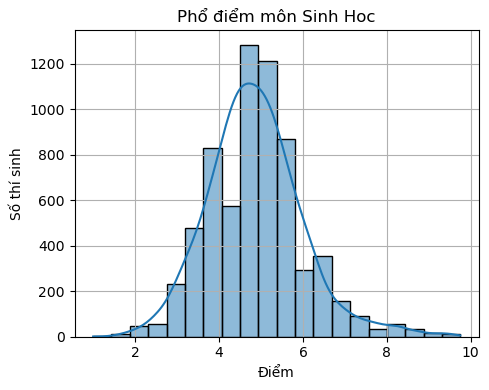

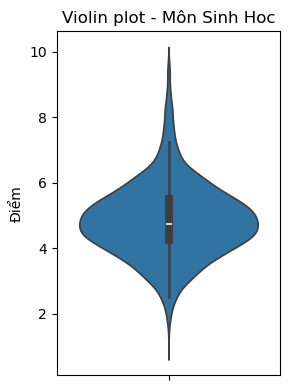



=== Thống kê mô tả môn KHTN ===
Số lượng: 6571
Điểm trung bình: 5.51
Điểm min: 2.0
Điểm max: 8.92
Độ lệch chuẩn: 1.04
----------------------------------------


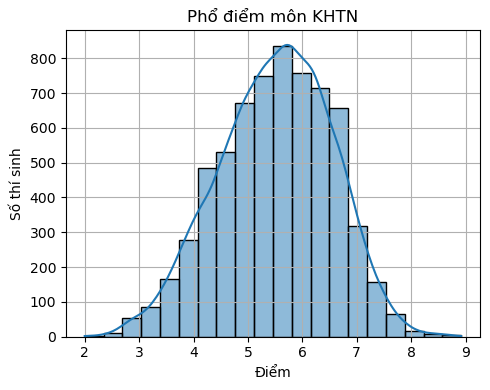

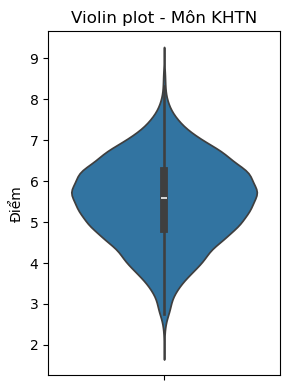



=== Thống kê mô tả môn Lich Su ===
Số lượng: 11682
Điểm trung bình: 4.49
Điểm min: 0.0
Điểm max: 9.75
Độ lệch chuẩn: 1.48
----------------------------------------


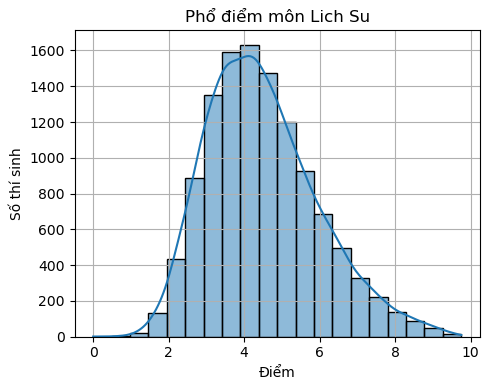

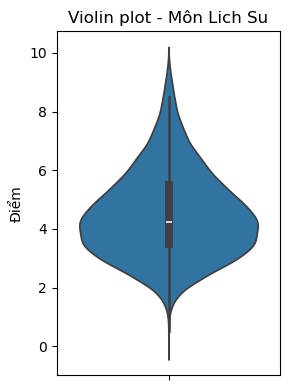



=== Thống kê mô tả môn Dia Ly ===
Số lượng: 11601
Điểm trung bình: 6.27
Điểm min: 0.0
Điểm max: 10.0
Độ lệch chuẩn: 1.2
----------------------------------------


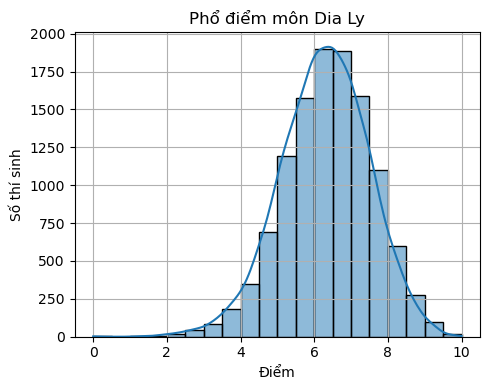

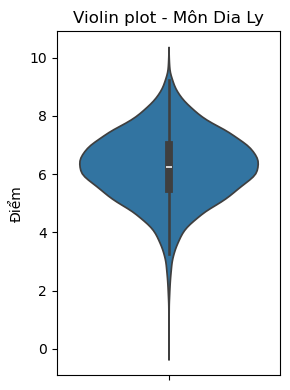



=== Thống kê mô tả môn GDCD ===
Số lượng: 10229
Điểm trung bình: 7.92
Điểm min: 0.5
Điểm max: 10.0
Độ lệch chuẩn: 1.11
----------------------------------------


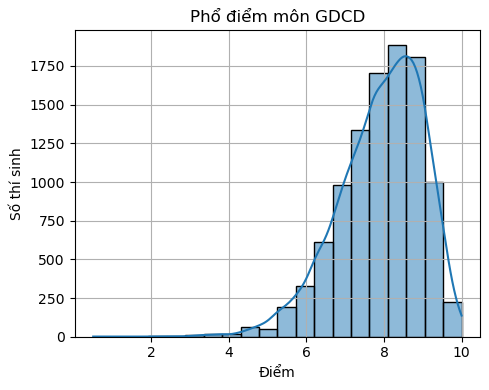

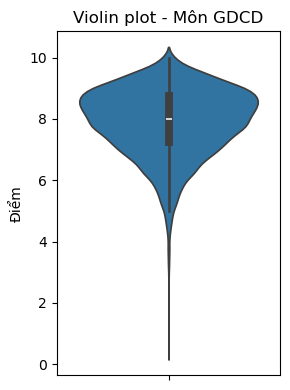



=== Thống kê mô tả môn KHXH ===
Số lượng: 10229
Điểm trung bình: 6.32
Điểm min: 1.25
Điểm max: 9.67
Độ lệch chuẩn: 1.03
----------------------------------------


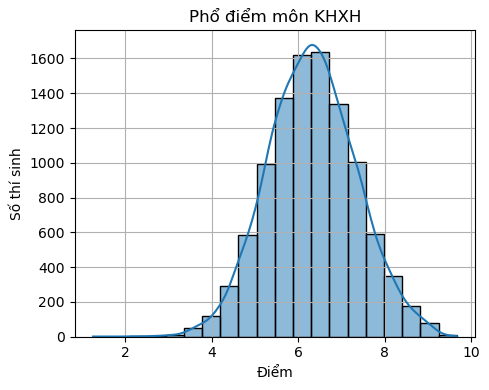

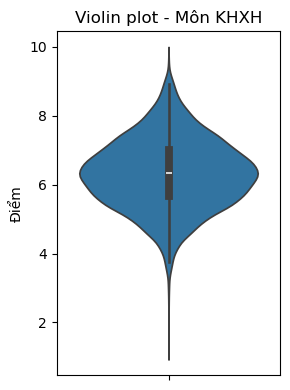

In [11]:
for c in cols_diem:
    # Kiểm tra xem có dữ liệu không (all NaN -> bỏ qua)
    if df[c].notna().sum() == 0:
        continue

    # 1. In thống kê mô tả cho môn c
    print(f"=== Thống kê mô tả môn {c} ===")
    print("Số lượng:", df[c].count())
    print("Điểm trung bình:", round(df[c].mean(),2))
    print("Điểm min:", df[c].min())
    print("Điểm max:", df[c].max())
    print("Độ lệch chuẩn:", round(df[c].std(),2))
    print("-"*40)

    # 2. Vẽ Histogram (phổ điểm)
    plt.figure(figsize=(5,4))
    sns.histplot(df[c], bins=20, kde=True)
    plt.title(f"Phổ điểm môn {c}")
    plt.xlabel("Điểm")
    plt.ylabel("Số thí sinh")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 3. Vẽ Violin plot
    plt.figure(figsize=(3,4))
    sns.violinplot(y=df[c])
    plt.title(f"Violin plot - Môn {c}")
    plt.ylabel("Điểm")
    plt.tight_layout()
    plt.show()

    # Thêm khoảng trống hoặc gạch ngang để tách giữa các môn
    print("\n" + "="*60 + "\n")

## 3.6 Boxplot tất cả các môn

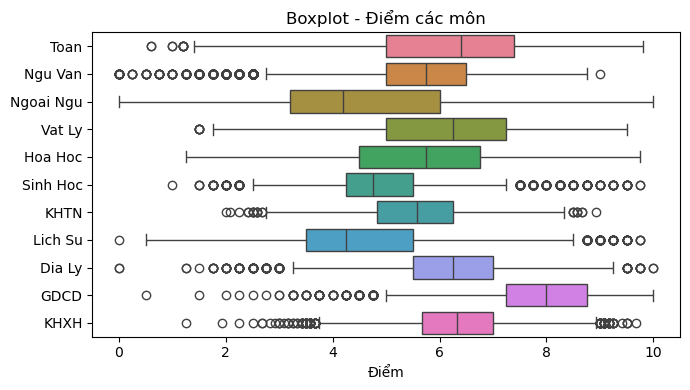

In [12]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df[cols_diem], orient="h")
plt.title("Boxplot - Điểm các môn")
plt.xlabel("Điểm")
plt.tight_layout()
plt.show()

## 3.7 Outlier tất cả các môn

In [13]:
threshold = 3 

*Môn Toán*

In [14]:
df_nonan_Toan = df[df['Toan'].notna()].copy()
z_scores_Toan = stats.zscore(df_nonan_Toan['Toan'])
df_nonan_Toan['ZScore_Toan'] = z_scores_Toan
outliers_Toan = df_nonan_Toan[abs(df_nonan_Toan['ZScore_Toan']) > threshold]

print("=== Môn Toán ===")
print("Số outlier (Toán):", len(outliers_Toan))
if len(outliers_Toan) > 0:
    print(outliers_Toan[['So Bao Danh','Toan','ZScore_Toan']])

=== Môn Toán ===
Số outlier (Toán): 4
      So Bao Danh  Toan  ZScore_Toan
1786      3001794   0.6    -3.318761
2849      3002860   1.0    -3.077310
3283      3003298   0.6    -3.318761
9936      3009996   1.0    -3.077310


*Môn Văn*

In [15]:
df_nonan_Van = df[df['Ngu Van'].notna()].copy()
z_scores_Van = stats.zscore(df_nonan_Van['Ngu Van'])
df_nonan_Van['ZScore_Van'] = z_scores_Van
outliers_Van = df_nonan_Van[abs(df_nonan_Van['ZScore_Van']) > threshold]

print("=== Môn Ngữ văn ===")
print("Số outlier (Ngữ văn):", len(outliers_Van))
if len(outliers_Van) > 0:
    print(outliers_Van[['So Bao Danh','Ngu Van','ZScore_Van']])

=== Môn Ngữ văn ===
Số outlier (Ngữ văn): 121
       So Bao Danh  Ngu Van  ZScore_Van
23         3000024     0.50   -3.835997
54         3000055     0.75   -3.649221
88         3000089     0.00   -4.209548
405        3000409     1.50   -3.088894
478        3000482     1.50   -3.088894
...            ...      ...         ...
16862      3016948     0.25   -4.022772
16952      3017038     1.25   -3.275670
17014      3017100     0.75   -3.649221
17020      3017106     1.50   -3.088894
17108      3017194     1.25   -3.275670

[121 rows x 3 columns]


*Môn Ngoại Ngữ*

In [16]:
df_nonan_NgoaiNgu = df[df['Ngoai Ngu'].notna()].copy()
z_scores_NgoaiNgu = stats.zscore(df_nonan_NgoaiNgu['Ngoai Ngu'])
df_nonan_NgoaiNgu['ZScore_Ngoai Ngu'] = z_scores_NgoaiNgu
outliers_NgoaiNgu = df_nonan_NgoaiNgu[abs(df_nonan_NgoaiNgu['ZScore_Ngoai Ngu']) > threshold]

print("=== Môn Ngoại ngữ ===")
print("Số outlier (Ngoại ngữ):", len(outliers_NgoaiNgu))
if len(outliers_NgoaiNgu) > 0:
    print(outliers_NgoaiNgu[['So Bao Danh','Ngoai Ngu','ZScore_Ngoai Ngu']].head(10))

=== Môn Ngoại ngữ ===
Số outlier (Ngoại ngữ): 0


*Môn Vật Lý*

In [37]:
df_nonan_VatLy = df[df['Vat Ly'].notna()].copy()
z_scores_VatLy = stats.zscore(df_nonan_VatLy['Vat Ly'])
df_nonan_VatLy['ZScore_Vat Ly'] = z_scores_VatLy
outliers_VatLy = df_nonan_VatLy[abs(df_nonan_VatLy['ZScore_Vat Ly']) > threshold]

print("=== Môn Vật lý ===")
print("Số outlier (Vật lý):", len(outliers_VatLy))
if len(outliers_VatLy) > 0:
    print(outliers_VatLy[['So Bao Danh','Vat Ly','ZScore_Vat Ly']])

=== Môn Vật lý ===
Số outlier (Vật lý): 5
       So Bao Danh  Vat Ly  ZScore_Vat Ly
4870       3004895     1.5      -3.047199
5880       3005911     1.5      -3.047199
10075      3010135     1.5      -3.047199
12397      3012465     1.5      -3.047199
16868      3016954     1.5      -3.047199


*Môn Hóa Học*

In [18]:
df_nonan_HoaHoc = df[df['Hoa Hoc'].notna()].copy()
z_scores_HoaHoc = stats.zscore(df_nonan_HoaHoc['Hoa Hoc'])
df_nonan_HoaHoc['ZScore_Hoa Hoc'] = z_scores_HoaHoc
outliers_HoaHoc = df_nonan_HoaHoc[abs(df_nonan_HoaHoc['ZScore_Hoa Hoc']) > threshold]

print("=== Môn Hóa học ===")
print("Số outlier (Hóa học):", len(outliers_HoaHoc))
if len(outliers_HoaHoc) > 0:
    print(outliers_HoaHoc[['So Bao Danh','Hoa Hoc','ZScore_HoaHoc']].head(10))

=== Môn Hóa học ===
Số outlier (Hóa học): 0


*Môn Sinh Học*

In [19]:
df_nonan_SinhHoc = df[df['Sinh Hoc'].notna()].copy()
z_scores_SinhHoc = stats.zscore(df_nonan_SinhHoc['Sinh Hoc'])
df_nonan_SinhHoc['ZScore_Sinh Hoc'] = z_scores_SinhHoc
outliers_SinhHoc = df_nonan_SinhHoc[abs(df_nonan_SinhHoc['ZScore_Sinh Hoc']) > threshold]

print("=== Môn Sinh học ===")
print("Số outlier (Sinh học):", len(outliers_SinhHoc))
if len(outliers_SinhHoc) > 0:
    print(outliers_SinhHoc[['So Bao Danh','Sinh Hoc','ZScore_Sinh Hoc']].head(10))

=== Môn Sinh học ===
Số outlier (Sinh học): 60
      So Bao Danh  Sinh Hoc  ZScore_Sinh Hoc
364       3000366      9.50         4.057111
1074      3001079      9.75         4.275591
1444      3001449      8.50         3.183193
1605      3001613      8.50         3.183193
1612      3001620      9.25         3.838632
1743      3001751      8.50         3.183193
1776      3001784      9.25         3.838632
4101      3004117      8.50         3.183193
4226      3004243      9.50         4.057111
4241      3004258      8.50         3.183193


*Môn KHTN*

In [20]:
df_nonan_KHTN = df[df['KHTN'].notna()].copy()
z_scores_KHTN = stats.zscore(df_nonan_KHTN['KHTN'])
df_nonan_KHTN['ZScore_KHTN'] = z_scores_KHTN
outliers_KHTN = df_nonan_KHTN[abs(df_nonan_KHTN['ZScore_KHTN']) > threshold]

print("=== KHTN ===")
print("Số outlier (KHTN):", len(outliers_KHTN))
if len(outliers_KHTN) > 0:
    print(outliers_KHTN[['So Bao Danh','KHTN','ZScore_KHTN']])

=== KHTN ===
Số outlier (KHTN): 6
       So Bao Danh  KHTN  ZScore_KHTN
3101       3003115  2.08    -3.304237
4352       3004372  8.67     3.051347
5191       3005218  2.00    -3.381391
5627       3005657  8.92     3.292454
7219       3007260  8.67     3.051347
11484      3011547  2.25    -3.140284


*Môn Lịch Sử*

In [21]:
df_nonan_LichSu = df[df['Lich Su'].notna()].copy()
z_scores_LichSu = stats.zscore(df_nonan_LichSu['Lich Su'])
df_nonan_LichSu['ZScore_Lich Su'] = z_scores_LichSu
outliers_LichSu = df_nonan_LichSu[abs(df_nonan_LichSu['ZScore_Lich Su']) > threshold]

print("=== Môn Lịch sử ===")
print("Số outlier (Lịch sử):", len(outliers_LichSu))
if len(outliers_LichSu) > 0:
    print(outliers_LichSu[['So Bao Danh','Lich Su','ZScore_Lich Su']])

=== Môn Lịch sử ===
Số outlier (Lịch sử): 67
       So Bao Danh  Lich Su  ZScore_Lich Su
2107       3002116     9.00        3.039929
2253       3002263     9.50        3.376860
3808       3003824     0.00       -3.024816
3865       3003881     9.50        3.376860
4059       3004075     9.25        3.208395
...            ...      ...             ...
16607      3016689     9.00        3.039929
16615      3016697     9.00        3.039929
16662      3016745     9.00        3.039929
16947      3017033     9.00        3.039929
17080      3017166     9.25        3.208395

[67 rows x 3 columns]


*Môn Địa Lý*

In [22]:
df_nonan_DiaLy = df[df['Dia Ly'].notna()].copy()
z_scores_DiaLy = stats.zscore(df_nonan_DiaLy['Dia Ly'])
df_nonan_DiaLy['ZScore_Dia Ly'] = z_scores_DiaLy
outliers_DiaLy = df_nonan_DiaLy[abs(df_nonan_DiaLy['ZScore_Dia Ly']) > threshold]

print("=== Môn Địa lý ===")
print("Số outlier (Địa lý):", len(outliers_DiaLy))
if len(outliers_DiaLy) > 0:
    print(outliers_DiaLy[['So Bao Danh','Dia Ly','ZScore_Dia Ly']])

=== Môn Địa lý ===
Số outlier (Địa lý): 49
       So Bao Danh  Dia Ly  ZScore_Dia Ly
1394       3001399    2.50      -3.133044
2115       3002124    2.50      -3.133044
3302       3003317    2.25      -3.340680
3307       3003322    2.00      -3.548316
3455       3003470    0.00      -5.209402
3503       3003519    2.00      -3.548316
3766       3003782    2.50      -3.133044
3928       3003944    2.25      -3.340680
4074       3004090    2.25      -3.340680
4212       3004229    1.50      -3.963587
4459       3004480    2.50      -3.133044
4497       3004519    1.25      -4.171223
4552       3004574    2.25      -3.340680
4711       3004734    2.50      -3.133044
4836       3004860    2.25      -3.340680
5609       3005638    2.00      -3.548316
5920       3005952    2.50      -3.133044
7165       3007206    2.50      -3.133044
7200       3007241    2.50      -3.133044
7258       3007299    2.00      -3.548316
7297       3007338    2.25      -3.340680
7371       3007413    2.50      -

*Môn GDCD*

In [23]:
df_nonan_GDCD = df[df['GDCD'].notna()].copy()
z_scores_GDCD = stats.zscore(df_nonan_GDCD['GDCD'])
df_nonan_GDCD['ZScore_GDCD'] = z_scores_GDCD
outliers_GDCD = df_nonan_GDCD[abs(df_nonan_GDCD['ZScore_GDCD']) > threshold]

print("=== Môn GDCD ===")
print("Số outlier (GDCD):", len(outliers_GDCD))
if len(outliers_GDCD) > 0:
    print(outliers_GDCD[['So Bao Danh','GDCD','ZScore_GDCD']])

=== Môn GDCD ===
Số outlier (GDCD): 73
       So Bao Danh  GDCD  ZScore_GDCD
312        3000314  4.50    -3.085225
640        3000644  3.25    -4.213815
730        3000735  4.00    -3.536661
1308       3001313  4.50    -3.085225
1471       3001477  4.50    -3.085225
...            ...   ...          ...
17325      3017411  3.25    -4.213815
17336      3017422  4.50    -3.085225
17605      3017692  4.50    -3.085225
17728      3017815  4.25    -3.310943
17800      3017887  4.00    -3.536661

[73 rows x 3 columns]


*Môn KHXH*

In [24]:
df_nonan_KHXH = df[df['KHXH'].notna()].copy()
z_scores_KHXH = stats.zscore(df_nonan_KHXH['KHXH'])
df_nonan_KHXH['ZScore_KHXH'] = z_scores_KHXH
outliers_KHXH = df_nonan_KHXH[abs(df_nonan_KHXH['ZScore_KHXH']) > threshold]

print("=== KHXH ===")
print("Số outlier (KHXH):", len(outliers_KHXH))
if len(outliers_KHXH) > 0:
    print(outliers_KHXH[['So Bao Danh','KHXH','ZScore_KHXH']])

=== KHXH ===
Số outlier (KHXH): 20
       So Bao Danh  KHXH  ZScore_KHXH
2913       3002925  3.17    -3.067999
3766       3003782  2.92    -3.311488
3768       3003784  3.00    -3.233571
3928       3003944  2.50    -3.720549
3958       3003974  3.08    -3.155655
3989       3004005  2.67    -3.554977
4175       3004192  3.00    -3.233571
4186       3004203  3.00    -3.233571
4212       3004229  1.25    -4.937994
4234       3004251  9.42     3.019227
7258       3007299  1.92    -4.285444
9640       3009699  9.50     3.097143
9700       3009759  9.67     3.262716
9978       3010038  9.50     3.097143
11995      3012061  2.83    -3.399144
14628      3014705  3.17    -3.067999
15571      3015650  9.50     3.097143
15596      3015675  2.25    -3.964038
15800      3015879  2.67    -3.554977
17270      3017356  3.17    -3.067999


## 3.8 Sự tương quan giữa các môn

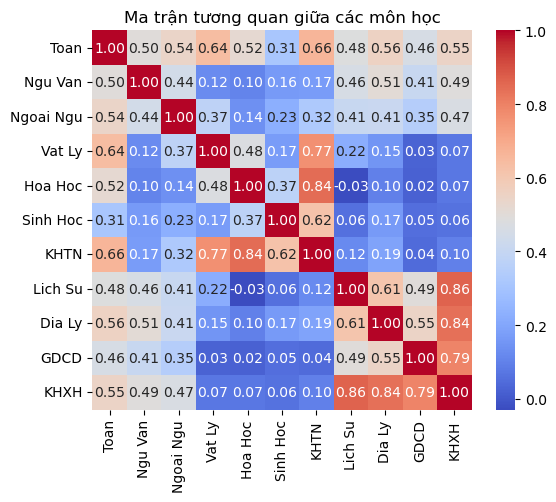

In [25]:
# Hạn chế NaN: chỉ tính trên những hàng có >= 2 môn có điểm
df_corr = df[cols_diem].dropna(how='all', axis=0)

corr_matrix = df_corr.corr()  # Pearson correlation
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Ma trận tương quan giữa các môn học")
plt.tight_layout()
plt.show()